In [41]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76

the type of this input is <class 'numpy.ndarray'>
shape:(183, 275, 3)


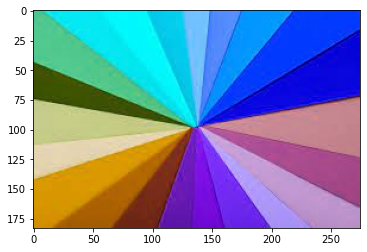

In [42]:
#let us read the image 
image = cv2.imread('colors.jfif')
print("the type of this input is {}".format(type(image)))
#showing the image using the matplot lib library 
plt.imshow(image)
#let us find the shape of image using the print function 
print("shape:{}".format(image.shape))

The color of the image looks different . This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).
in open cv we have a module named cv2.COLOR_BGR2RGB Which converts the bgr image to rgb image 


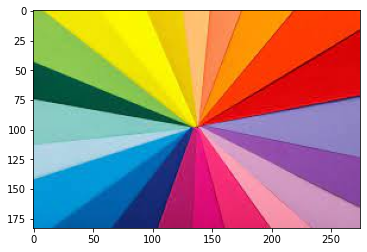

In [43]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
#below we can see the orginal image 

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [44]:
def RGB2HEX(color):
    return"#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))
    


In [45]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

we are going to define a function which has 3 parameters including the selection of image or selecting the path of image 
and finding the number of colors which we should enter (how many colors we want to identify in the image)
and also drawing a chart showing how many colors it have and how much percent of  that color it has in that image 

In [46]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image,(600,400),interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    clf = KMeans(n_clusters= number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    centr_colors = clf.cluster_centers_
    ordered_colors = [centr_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(8,6))
        plt.pie(counts.values(),labels=hex_colors,colors=hex_colors)
    return rgb_colors


CALLING OUR DEFINED FUNCTION USING OUR PRE DEFINED PARAMETERS LIK FINDING THE PATH OF IMAGE , NO OF COLORS AND Wheather we want to show the chart using true or false 
if you want to show the graph use true if not the false 

[array([93.40846824, 33.6762142 , 84.70859278]),
 array([251.75489804, 146.02359056,   7.38264694]),
 array([132.6387482 , 202.02078766, 197.6325497 ]),
 array([ 22.46088561,  43.52706027, 118.03800738]),
 array([140.77357875, 198.77938777,  79.58520984]),
 array([141.65222651,  76.6547214 , 167.7705451 ]),
 array([246.88782244, 150.85242951, 175.12072585]),
 array([179.93338279,  25.6111276 , 100.09154303]),
 array([252.541087  , 191.93414951, 110.65850492]),
 array([219.80862008,  14.81216744, 116.91149344]),
 array([250.22547417, 135.52190974,  78.00539568]),
 array([  4.37096977, 150.40371537, 214.48476071]),
 array([145.1344516 , 133.2051232 , 197.57336974]),
 array([ 5.17953688, 82.08538203, 59.50096909]),
 array([207.47748519, 149.98865339, 191.18504246]),
 array([167.50927152,  10.83112583,   9.13576159]),
 array([246.21428214, 238.59762632,   3.41634534]),
 array([250.70621192,  58.69919495,   4.71491514]),
 array([ 70.3342246 , 140.94117647,  93.10962567]),
 array([124.143472

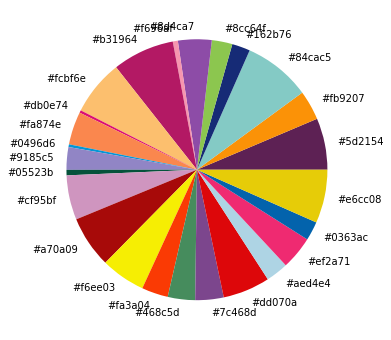

In [49]:
get_colors(get_image('colors.jfif'),25,True)